In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros para la distribución normal del gasto
mean_spend = 600  # Media del gasto
std_spend = 150   # Desviación estándar del gasto
n_days = 180  # Número de días a simular

# Parámetros de las plataformas con decay exponencial
platforms = {
    'Google Ads': {'cpm': 5, 'ctr': 0.02, 'alpha': 0.000002, 'beta': 0.05},
    'Facebook Ads': {'cpm': 4, 'ctr': 0.015, 'alpha': 0.0000018, 'beta': 0.045},
    'Programmatic': {'cpm': 6, 'ctr': 0.012, 'alpha': 0.0000015, 'beta': 0.04}
}

# Generar gasto utilizando distribución normal sin truncado
def generate_normal_spend(mean_spend, std_spend, n_days):
    spend = np.random.normal(loc=mean_spend, scale=std_spend, size=n_days)
    return spend[spend > 0]  # Filtrar los valores negativos

# Función para generar datos con tasa de conversión basada en decay exponencial
def generate_data_with_exponential_decay(platform, params, n_days):
    data = []
    spend_values = generate_normal_spend(mean_spend, std_spend, n_days)
    
    for day in range(len(spend_values)):
        date = pd.Timestamp('2023-01-01') + pd.Timedelta(days=day)
        spend = spend_values[day]
        impressions = int((spend / params['cpm']) * 1000)
        clicks = int(impressions * params['ctr'])
        if impressions > 0:
            # Tasa de conversión con decay exponencial
            conversion_rate = params['beta'] * np.exp(-params['alpha'] * impressions)
            conversion_rate = max(0, min(conversion_rate, 1))  # Limitar entre 0 y 1
        else:
            conversion_rate = 0
        conversions = int(clicks * conversion_rate)
        data.append([date, platform, spend, impressions, clicks, conversions])
    
    return data

# Generar datos para las plataformas
all_data = []
for platform, params in platforms.items():
    platform_data = generate_data_with_exponential_decay(platform, params, n_days)
    all_data.extend(platform_data)

# Crear DataFrame
columns = ['Fecha', 'Plataforma', 'Gasto (€)', 'Impresiones', 'Clics', 'Conversiones']
df = pd.DataFrame(all_data, columns=columns)

# Añadir columnas de CTR y CPA
df['CTR'] = df['Clics'] / df['Impresiones']
df['CPA'] = df['Gasto (€)'] / df['Conversiones']
df['CPA'].replace([float('inf'), -float('inf')], np.nan, inplace=True)  # Reemplazar infinitos por NaN

# EDA: Gasto vs CTR y Gasto vs CPA
plt.figure(figsize=(12, 5))

# Gasto vs CTR
plt.subplot(1, 2, 1)
sns.scatterplot(x='Gasto (€)', y='CTR', hue='Plataforma', data=df, alpha=0.7)
plt.title('Gasto (€) vs CTR (Exponential Decay)')

# Gasto vs CPA
plt.subplot(1, 2, 2)
sns.scatterplot(x='Gasto (€)', y='CPA', hue='Plataforma', data=df, alpha=0.7)
plt.title('Gasto (€) vs CPA (Exponential Decay)')

plt.tight_layout()
plt.show()


[76.92439742 74.93035237 73.5086657  72.40300907 71.49811997 70.73217117
 70.06812068 69.48201234 68.95745637 68.48274435 68.04922038 67.6503043
 67.28087681 66.9368767  66.61502797 66.31264958 66.02751957 65.75777591
 65.5018427  65.2583744  65.02621302 64.80435479 64.59192394 64.38815185
 64.19236019 64.00394736 63.82237735 63.64717047 63.47789579 63.31416473
 63.15562568 63.00195944 62.85287538 62.70810814 62.56741473 62.43057214
 62.29737517 62.16763461 62.0411756  61.91783624 61.79746628 61.67992613
 61.56508576 61.45282394 61.34302742 61.23559024 61.13041312 61.02740295
 60.92647223 60.82753866 60.73052474 60.63535739 60.54196762 60.45029024
 60.3602636  60.27182928 60.18493195 60.09951908 60.01554081 59.93294974
 59.8517008  59.77175104 59.69305959 59.61558744 59.53929738 59.46415389
 59.390123   59.31717226 59.24527059 59.17438825 59.10449674 59.03556874
 58.96757805 58.90049951 58.83430898 58.76898326 58.70450003 58.64083783
 58.57797604 58.51589476 58.45457485 58.39399787 58.

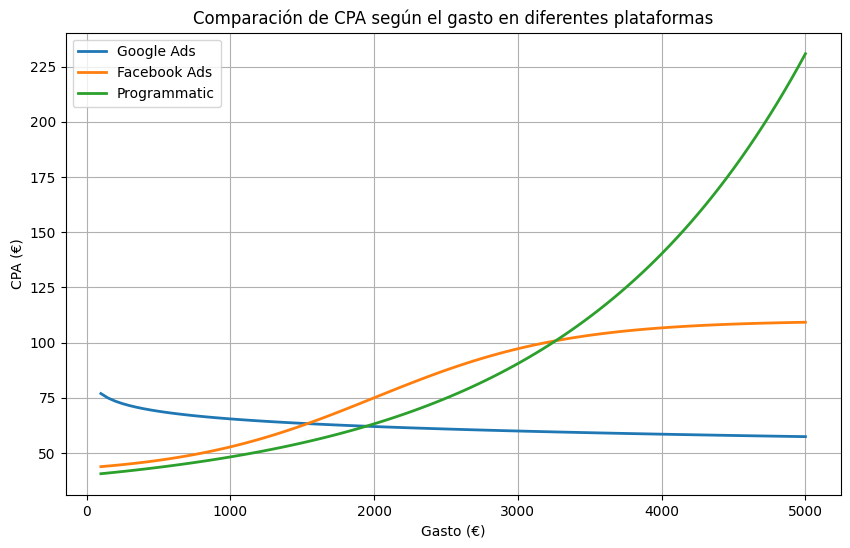

,Gasto (€),Google Ads CPA,Facebook Ads CPA,Programmatic CPA,Google Ads Clics,Facebook Ads Clics,Programmatic Clics,Google Ads Impresiones,Facebook Ads Impresiones,Programmatic Impresiones
0,100.000000,76.924397,43.827692,40.618365,66.666667,83.333333,125.000000,3333.333333,5555.555556,10416.666667
1,149.494949,74.930352,44.105384,40.938428,99.663300,124.579125,186.868687,4983.164983,8305.274972,15572.390572
2,198.989899,73.508666,44.401881,41.268137,132.659933,165.824916,248.737374,6632.996633,11054.994388,20728.114478
3,248.484848,72.403009,44.718258,41.607785,165.656566,207.070707,310.606061,8282.828283,13804.713805,25883.838384
4,297.979798,71.498120,45.055622,41.957671,198.653199,248.316498,372.474747,9932.659933,16554.433221,31039.562290


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el rango de gasto
gasto = np.linspace(100, 5000, 100)

# Ajustar CPA para Google Ads (logarítmica inversa)
a_g, b_g = -5, 100  # La curva empezará cerca de 120 y se ajusta lentamente
cpa_google = a_g * np.log(gasto + 1) + b_g

# Mantener CPA para Facebook Ads (sigmoidea)
L_fb, k_fb, x0_fb, b_fb = 70, 0.0015, 2000, 40
cpa_facebook = L_fb / (1 + np.exp(-k_fb * (gasto - x0_fb))) + b_fb

# Mantener CPA para Programmatic (exponencial)
c_p, d_p = 0.02, 0.0006
cpa_programmatic = c_p * np.exp(d_p * gasto) * 500 + 30

# Definir CTRs para las tres plataformas
ctr_google = 0.02  # Google Ads CTR
ctr_facebook = 0.015  # Facebook Ads CTR
ctr_programmatic = 0.012  # Programmatic CTR

# Asumimos un CPC medio para cada plataforma
cpc_google = 1.5  # Costo por clic de Google Ads
cpc_facebook = 1.2  # Costo por clic de Facebook Ads
cpc_programmatic = 0.8  # Costo por clic de Programmatic

# Calcular clics para cada plataforma a partir del gasto
clicks_google = gasto / cpc_google
clicks_facebook = gasto / cpc_facebook
clicks_programmatic = gasto / cpc_programmatic

# Calcular impresiones a partir de los clics y CTR
impressions_google = clicks_google / ctr_google
impressions_facebook = clicks_facebook / ctr_facebook
impressions_programmatic = clicks_programmatic / ctr_programmatic

# Crear DataFrame para almacenar los datos
df_cpa = pd.DataFrame({
    'Gasto (€)': gasto,
    'Google Ads CPA': cpa_google,
    'Facebook Ads CPA': cpa_facebook,
    'Programmatic CPA': cpa_programmatic,
    'Google Ads Clics': clicks_google,
    'Facebook Ads Clics': clicks_facebook,
    'Programmatic Clics': clicks_programmatic,
    'Google Ads Impresiones': impressions_google,
    'Facebook Ads Impresiones': impressions_facebook,
    'Programmatic Impresiones': impressions_programmatic
})

# Gráfico de CPA vs Gasto para las 3 plataformas
plt.figure(figsize=(10, 6))
sns.lineplot(x='Gasto (€)', y='Google Ads CPA', data=df_cpa, label='Google Ads', linewidth=2)
sns.lineplot(x='Gasto (€)', y='Facebook Ads CPA', data=df_cpa, label='Facebook Ads', linewidth=2)
sns.lineplot(x='Gasto (€)', y='Programmatic CPA', data=df_cpa, label='Programmatic', linewidth=2)
plt.title('Comparación de CPA según el gasto en diferentes plataformas')
plt.ylabel('CPA (€)')
plt.xlabel('Gasto (€)')
plt.grid(True)
plt.legend()



plt.show()

# Mostrar las primeras filas del DataFrame actualizado
df_cpa.head()


In [10]:
# Definimos las tres listas con sus nombres
lista_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lista_2 = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
lista_3 = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

# Usamos un diccionario para asignar un nombre a cada lista
listas = {
    'lista_1': lista_1,
    'lista_2': lista_2,
    'lista_3': lista_3
}

# Función para acceder a un elemento por nombre de lista y número de índice
def obtener_elemento(nombre_lista, indice):
    return listas[nombre_lista][indice]

# Ejemplo de acceso
print(listas['lista_1'][2])  # Resultado: 3
print(obtener_elemento('lista_2', 5))  # Resultado: 16
print(obtener_elemento('lista_3', 9))  # Resultado: 30


3
16
30
